Question 1

In [3]:
import numpy as np 
import sklearn
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

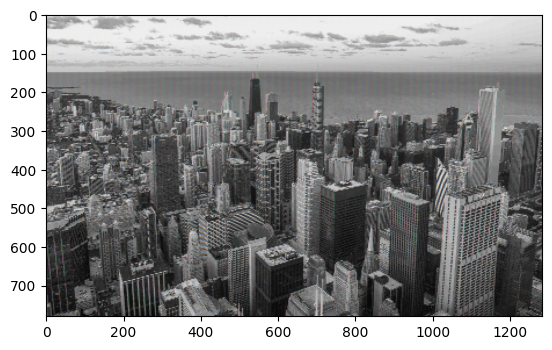

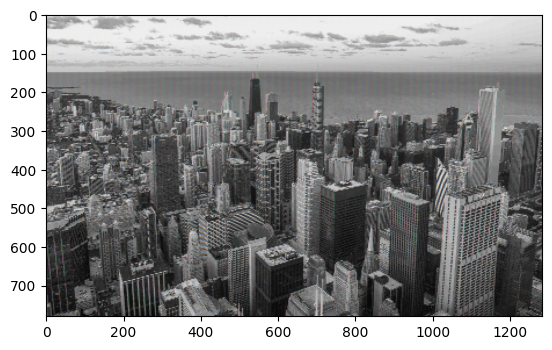

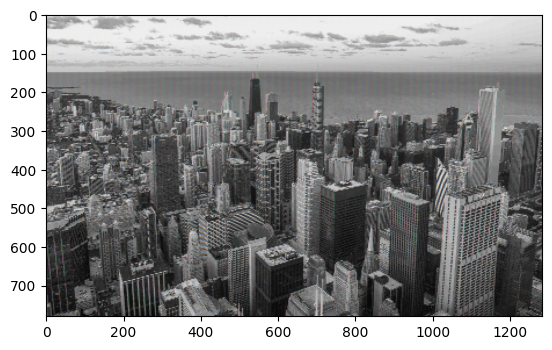

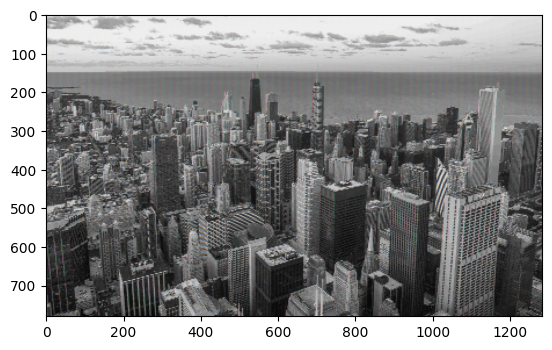

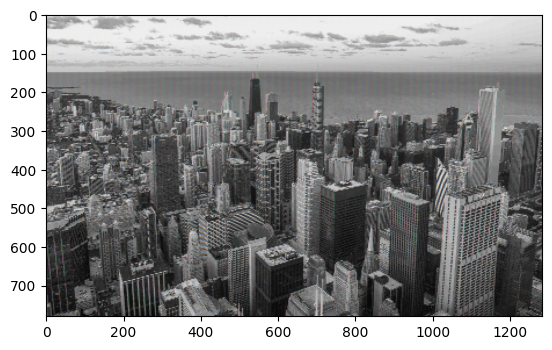

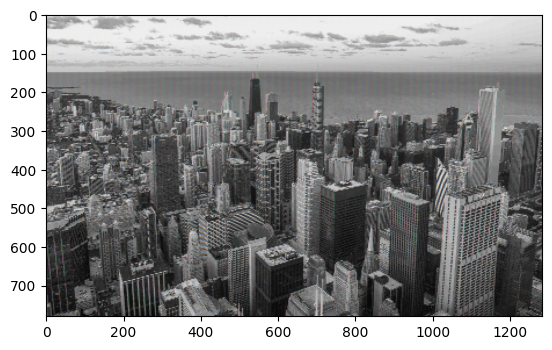

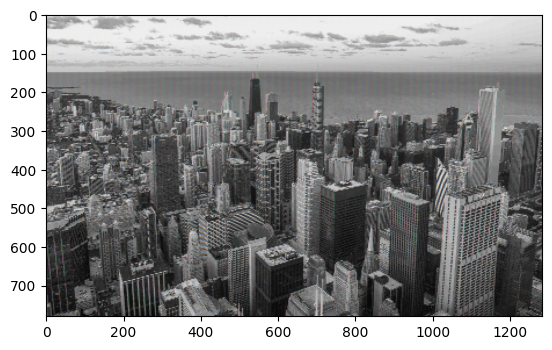

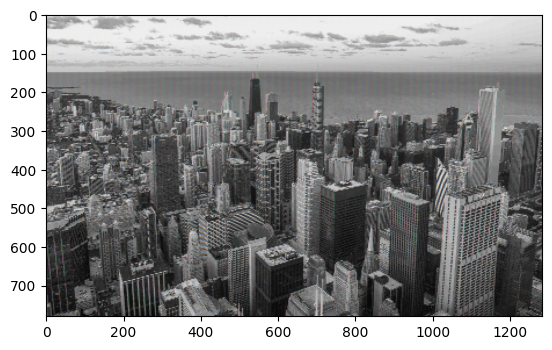

In [39]:
import sklearn.cluster

def find_chunk(y,x, img_x):
    return (y//3)*(img_x//3) + x//3

def find_vector_index(j,i):
    return (j)*(3) + i

def reconstruct_index_to_pixel(vector, i): 
    pixel = np.array(vector[i:i+3])
    return pixel

k_list = [2, 5, 10, 50, 200, 500, 1000, 2000]
img = mpimg.imread('cityview.png')

# split image into 3 by 3 chunks
index_chunk_dict = {}
chunks = [ img[i:i+3, j:j+3] for i in range(0, img.shape[0], 3) for j in range(0, img.shape[1], 3) ]

# transform each chunk into a vector
matrix = np.array([np.ndarray.flatten(chunk) for chunk in chunks])

# apply k-means clustering
reconstructed_images = []
reconstructed_img = np.zeros(img.shape)
for k in k_list:
    centroids, label, inertia = sklearn.cluster.k_means(matrix, k)
    for y in range(0, img.shape[0], 3):
        for x in range(0, img.shape[1], 3):
            chunk_index = find_chunk(y,x,img.shape[1])
            cluster_number = label[chunk_index]
            for j in range(3):
                for i in range(3):
                    vector_index = find_vector_index(j,i)
                    reconstructed_img[y + j,x + i] = reconstruct_index_to_pixel(centroids[cluster_number], vector_index)
            # for bottom in range(0, 3):
            #     for left in range(0, 3):
            #         cluster_center_vector = centroids[label[i]] # 3 vs 27
            #         left_most_pixel = i * 3 + j*3
            #         # print(len(reconstructed_img[bottom, left]))
            #         # print(len(cluster_center_vector[left_most_pixel:left_most_pixel+3]))
            #         reconstructed_img[i, j] = cluster_center_vector[left_most_pixel:left_most_pixel+3]

    reconstructed_images.append(reconstructed_img)

for recon_img in reconstructed_images:
    plt.imshow(recon_img)
    plt.show()



In [9]:
reconstructed_img = []
for chunk in chunks:
    reconstructed_img.append(chunks)

reconstructed_img


KeyboardInterrupt: 